## pyΔ.next

In [1]:
import sys; print(sys.path)
%matplotlib inline
import pandas as pd
import numpy as np
try:
    import seaborn     # sieht halt besser aus
except ImportError:
    pass               # dann halt nicht
import delta

['/home/tv/git/pydelta', '/usr/lib/python39.zip', '/usr/lib/python3.9', '/usr/lib/python3.9/lib-dynload', '', '/home/tv/.virtualenvs/pydelta/lib/python3.9/site-packages', '/home/tv/git/pydelta', '/home/tv/.virtualenvs/pydelta/lib/python3.9/site-packages/IPython/extensions', '/home/tv/.ipython']


## 1. Corpus vorbereiten

In [2]:
whole_corpus = delta.Corpus("test/corpus3/")
corpus = whole_corpus.top_n(2500)

### 2. Corpus → Distanzmatrix

In [3]:
distances = delta.functions.cosine_delta(corpus)
distances

,"Raabe,-Wilhelm_Im-alten-Eisen","Fontane,-Theodor_Der-Stechlin","Raabe,-Wilhelm_Stopfkuchen","Marlitt,-Eugenie_Das-Geheimnis-der-alten-Mamsell","Raabe,-Wilhelm_Die-Chronik-der-Sperlingsgasse","Marlitt,-Eugenie_Die-Frau-mit-den-Karfunkelsteinen","Fontane,-Theodor_Frau-Jenny-Treibel","Fontane,-Theodor_Effi-Briest","Marlitt,-Eugenie_Das-Heideprinzesschen"
"Raabe,-Wilhelm_Im-alten-Eisen",0.000000,1.343237,0.624532,1.200938,0.732207,1.215720,0.886441,1.258676,1.395609
"Fontane,-Theodor_Der-Stechlin",1.343237,0.000000,1.246155,1.331243,1.402441,1.257329,1.017926,0.640157,1.119296
"Raabe,-Wilhelm_Stopfkuchen",0.624532,1.246155,0.000000,1.268060,0.793546,1.247171,0.909698,1.209208,1.387786
"Marlitt,-Eugenie_Das-Geheimnis-der-alten-Mamsell",1.200938,1.331243,1.268060,0.000000,1.133478,0.801244,1.267795,1.304392,0.725335
"Raabe,-Wilhelm_Die-Chronik-der-Sperlingsgasse",0.732207,1.402441,0.793546,1.133478,0.000000,1.203421,0.837908,1.280661,1.329303
"Marlitt,-Eugenie_Die-Frau-mit-den-Karfunkelsteinen",1.215720,1.257329,1.247171,0.801244,1.203421,0.000000,1.354223,1.260774,0.722380
"Fontane,-Theodor_Frau-Jenny-Treibel",0.886441,1.017926,0.909698,1.267795,0.837908,1.354223,0.000000,0.897811,1.506644
"Fontane,-Theodor_Effi-Briest",1.258676,0.640157,1.209208,1.304392,1.280661,1.260774,0.897811,0.000000,1.215294
"Marlitt,-Eugenie_Das-Heideprinzesschen",1.395609,1.119296,1.387786,0.725335,1.329303,0.722380,1.506644,1.215294,0.000000


In [4]:
distances.simple_score()

1.851976045085546

In [5]:
distances.metadata

Metadata(complete=False, corpus='test/corpus3/', delta='cosine_delta', delta_descriptor='cosine-z_score', delta_title='Cosine Delta', features='words', frequencies=False, lower_case=False, normalization=('z_score',), ordered=True, words=2500)

### Nun ein hierarchisches Clustering

/home/tv/git/pydelta/delta/graphics.py:88: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(2)


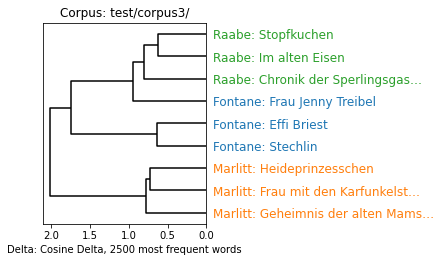

In [6]:
hclust = delta.Clustering(distances)
delta.Dendrogram(hclust).show()

### Flachklopfen

In [7]:
fclust = hclust.fclustering()
print(fclust.describe())
print(fclust.evaluate())

3 clusters of 9 documents (ground truth: 3 groups):
{1: ['Marlitt: Geheimnis der alten Mams…', 'Marlitt: Frau mit den Karfunkelst…',
     'Marlitt: Heideprinzesschen'],
 2: ['Fontane: Stechlin', 'Fontane: Effi Briest'],
 3: ['Raabe: Im alten Eisen', 'Raabe: Stopfkuchen',
     'Raabe: Chronik der Sperlingsgas…', 'Fontane: Frau Jenny Treibel']}

Cluster Errors         1.000000
Adjusted Rand Index    0.642857
Homogeneity            0.772507
Completeness           0.800000
V Measure              0.786013
Purity                 0.888889
Entropy                0.227493
dtype: float64


### Deltafunktionen

Cosine Delta kann jeder. Was gibts denn sonst so?

In [8]:
delta.functions

Da fehlt Everts Ternarisierung! Erstmal eine Normalisierungsfunktion schreiben:

In [9]:
@delta.normalization
def ternarize(z):    
    result = pd.DataFrame(np.zeros_like(z), index=z.index, columns=z.columns)
    result[z < -2/3] = -1
    result[z > +2/3] = +1
    return result

Registering ternarize as ternarize, replacing existing function with this name


Nun in eine Deltafunktion einbauen.

In [10]:
delta.deltas.CompositeDeltaFunction(descriptor="euclidean-z_score-ternarize", name="ternarized_delta", title="Ternarized Delta")
#  heute schrübe ich das nicht mehr so -----------´

/home/tv/git/pydelta/delta/graphics.py:88: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(2)


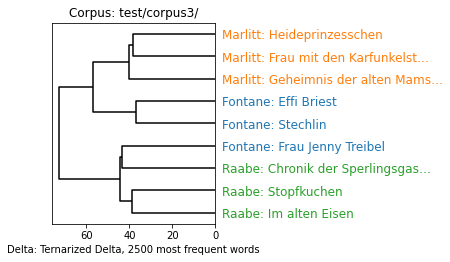

In [11]:
distances_t = delta.functions.ternarized_delta(corpus)
hclust_t = delta.Clustering(distances_t)
delta.Dendrogram(hclust_t).show()

In [12]:
print(distances_t.evaluate())

F-Ratio         0.703738
Fisher's LD     7.042422
Simple Score    1.537760
dtype: float64


In [13]:
distances_t.metadata

Metadata(complete=False, corpus='test/corpus3/', delta='ternarized_delta', delta_descriptor='euclidean-z_score-ternarize', delta_title='Ternarized Delta', features='words', frequencies=False, lower_case=False, normalization=('z_score', 'ternarize'), ordered=True, words=2500)

<AxesSubplot:>

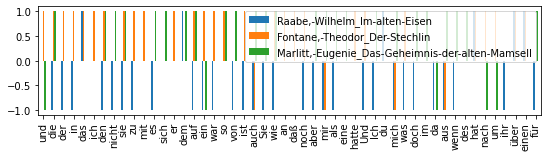

In [14]:
delta.graphics.spikeplot(delta.functions.ternarize(delta.functions.z_score(corpus.top_n(1000))), docs=[0,1,3])